## imoport pkgs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

## Load Data

In [2]:
## load data
df_settle_clendar_raw = pd.read_csv('data/seattle/calendar.csv')
df_settle_listings_raw = pd.read_csv('data/seattle/listings.csv')
df_settle_reviews_raw = pd.read_csv('data/seattle/reviews.csv')

df_boston_airbnb_calendar_raw = pd.read_csv('data/boston-airbnb-open-data/calendar.csv')
df_boston_airbnb_listings_raw = pd.read_csv('data/boston-airbnb-open-data/listings.csv')
df_boston_airbnb_reviews_raw = pd.read_csv('data/boston-airbnb-open-data/reviews.csv')

## Explore Data

### df_settle_clendar_raw

In [3]:
info_dic = {'Feature':pd.Series(['listing_id','date','available','price']),
            'Meaning':pd.Series(['清单id','日期','是否有效','价格']),
           }
df_settle_clendar_raw_info = pd.DataFrame(info_dic)
df_settle_clendar_raw_info

,Feature,Meaning
0,listing_id,清单id
1,date,日期
2,available,是否有效
3,price,价格


In [4]:
df_settle_clendar_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
df_settle_clendar_raw.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
## get all the NaN values in price
df_settle_clendar_raw[df_settle_clendar_raw['price'].isnull()].head()

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN


After explore the NaN value of df_settle_clendar_raw,it only appear in unavailable line.So we don't need to drop it.

### df_settle_listings_raw

-   The table of df_seattle_listings_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|id|id|PK|
|listing_url|清单url||
|scrape_id|||
|last_scraped|||
|name|清单名||
|summary|摘要||
|space|空间||
|description|描述||
|experiences_offered|体验||
|neighborhood_overview|邻居||
|notes|记录||
|transit|中转||
|thumbnail_url|简介url||
|medium_url|视频url||
|picture_url|图片url||
|xl_picture_url|x1图片url||
|host_id|租客id||
|host_url|租客url||
|host_name|租客姓名||
|host_since|租客||
|host_location|租客地址||
|host_about|租客信息||
|host_response_time|租客响应时间||
|host_response_rate|租客响应率||
|host_acceptance_rate|租客验收率||
|host_is_superhost|租客是会员||
|host_thumbnail_url|租客简介url||
|host_picture_url|租客图片url||
|host_neighbourhood|租客邻居||
|host_listings_count|租客清单数||
|host_total_listings_count|租客清单总数||
|host_verifications|租客验证信息||
|host_has_profile_pic|租客是否有头像||
|host_identity_verified|租客账户是否验证||
|street|街道||
|neighbourhood|邻居||
|neighbourhood_cleansed|||
|neighbourhood_group_cleansed|||
|city|城市||
|state|街道||
|zipcode|邮编||
|market|市场||
|smart_location|智能定位||
|country_code|国家代码||
|country|国家||
|latitude|纬度||
|longitude|经度||
|is_location_exact|位置是否准确||
|property_type|房屋种类||
|room_type|房型||
|accommodates|容纳空间||
|bathrooms|浴室||
|bedrooms|卧室||
|beds|床||
|bed_type|床类型||
|amenities|设施||
|square_feet|平方||
|price|价格||
|weekly_price|价格(周)||
|monthly_price|价格(月)||
|security_deposit|保证金||
|cleaning_fee|清洁费||
|guests_included|客人数||
|extra_people|额外的人||
|minimum_nights|最少的夜晚||
|maximum_nights|最多的夜晚||
|calendar_updated|日历已更新||
|has_availability|有空房||
|availability_30|可租(30天)||
|availability_60|可租(60天)||
|availability_90|可租(90天)||
|availability_365|可租(365天)||
|calendar_last_scraped|||
|number_of_reviews|评论数||
|first_review|第一条评论||
|last_review|最后一条评论||
|review_scores_rating|评论分数||
|review_scores_accuracy|评论分数(准确度)||
|review_scores_cleanliness|评论分数(清洁度)||
|review_scores_checkin|评论分数(入住)||
|review_scores_communication|评论分数(交流)||
|review_scores_location|评论分数(位置)||
|review_scores_value|评论分数(价值)||
|requires_license|需要许可证||
|license|许可证||
|jurisdiction_names|辖区名称||
|instant_bookable|即时预订||
|cancellation_policy|取消政策||
|require_guest_profile_picture|需要租客头像||
|require_guest_phone_verification|需要租客手机通过验证||
|calculated_host_listings_count|计算租客清单数量||
|reviews_per_month|每个月的评论||


In [7]:
df_settle_listings_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
df_settle_listings_raw.loc[0]

id                                                                             241032
listing_url                                       https://www.airbnb.com/rooms/241032
scrape_id                                                              20160104002432
last_scraped                                                               2016-01-04
name                                                     Stylish Queen Anne Apartment
summary                                                                           NaN
space                               Make your self at home in this charming one-be...
description                         Make your self at home in this charming one-be...
experiences_offered                                                              none
neighborhood_overview                                                             NaN
notes                                                                             NaN
transit                                               

### df_settle_reviews_raw

In [9]:
df_settle_reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [10]:
info_dic = {'Feature':pd.Series(['listing_id','id','date','reviewer_id','reviewer_name','comments']),
            'Meaning':pd.Series(['清单id','id','日期','审核人id','审核人名','备注']),
            'Relation':pd.Series(["df_seattle_listings_raw['id']",'PK','','','','']),
           }
df_settle_reviews_raw_info = pd.DataFrame(info_dic)
df_settle_reviews_raw_info

,Feature,Meaning,Relation
0,listing_id,清单id,df_seattle_listings_raw['id']
1,id,id,PK
2,date,日期,
3,reviewer_id,审核人id,
4,reviewer_name,审核人名,
5,comments,备注,


In [11]:
df_settle_reviews_raw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Clean Up

In [12]:
## available settle
df_settle_clendar_raw.loc[df_settle_clendar_raw['available']=='t'].shape[0]/df_settle_clendar_raw.shape[0]

0.6706100160020666

67.061% house available 

In [13]:
# Error Data
na_price = df_settle_clendar_raw[pd.isna(df_settle_clendar_raw['price'])]
error = na_price.loc[na_price['available']=='t']

print ('There are {} error data'.format(error.shape[0]))

There are 0 error data


In [14]:
df_settle_clendar_raw['date'] = pd.to_datetime(df_settle_clendar_raw['date'])
df = df_settle_clendar_raw.set_index('date')

df['count'] = 1

df_t = df[df['available']=='t']
df_f = df[df['available']!='t']

df_t_period = df_t.resample('M').sum().to_period('M')
df_t_list = df_t_period.loc[:,['count']]
df_t_list.head()

,count
date,
2016-01,59239
2016-02,73321
2016-03,83938
2016-04,76037
2016-05,79971


In [15]:
df_f_period = df_f.resample('M').sum().to_period('M')
df_f_list = df_f_period.loc[:,['count']]
df_f_list.head()

,count
date,
2016-01,47665
2016-02,37401
2016-03,34420
2016-04,38503
2016-05,38387


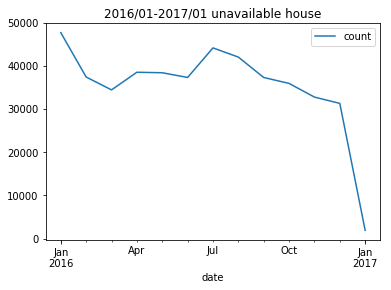

In [16]:
df_f_list.plot(title='2016/01-2017/01 unavailable house')

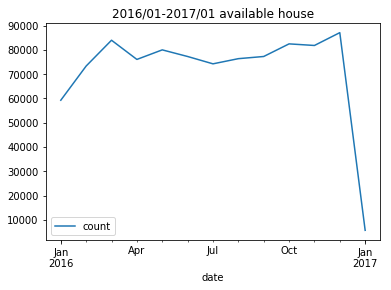

In [17]:
df_t_list.plot(title='2016/01-2017/01 available house')

In [18]:
merge_pd = df_settle_clendar_raw.dropna().merge(df_settle_listings_raw,left_on='listing_id',right_on='id',how='inner')
merge_pd.head()

,listing_id,date,available,price_x,id,listing_url,scrape_id,last_scraped,name,summary,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,241032,2016-01-05,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,241032,2016-01-13,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
3,241032,2016-01-14,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
4,241032,2016-01-18,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [19]:
def get_NaN_feature_names(df)->None:
    """get feature have NaN values"""
    nan_list =[col_name for col_name in df.columns if df[col_name].isnull().sum() > 0]
    print(nan_list)
get_NaN_feature_names(df_settle_listings_raw)

['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']


#### features have NaN values:
- 'summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 
- 'medium_url', 'xl_picture_url', 'host_name', 'host_since', 'host_location', 'host_about', 
- 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
- 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 
- 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 
- 'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price', 
- 'monthly_price', 'security_deposit', 'cleaning_fee', 'first_review', 'last_review', 
- 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
- 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month'

### which feature don't need to drop?
1. summary
2. space
3. neighborhood_overview
4. notes
5. transit
6. thumbnail_url
7. medium_url
8. xl_picture_url
9. host_since
10. host_about
11. host_response_time
12. host_response_rate
13. host_acceptance_rate
14. host_is_superhost
15. host_thumbnail_url
15. host_picture_url
16. host_listings_count
17. host_total_listings_count
18. host_has_profile_pic
19. host_identity_verified
20. neighbourhood
21. zipcode
22. weekly_price
23. monthly_price
24. reviews_per_month

### which feature need to drop or  replace ?

1. host_name
2. host_location
3. host_is_superhost
4. property_type
5. bathrooms
6. bedrooms
7. beds
8. square_feet
9. security_deposit
10. cleaning_fee
11. first_review
12. last_review
13. review_scores_rating
14. review_scores_accuracy
15. review_scores_cleanliness
16. review_scores_checkin
17. review_scores_communication
18. review_scores_location
19. review_scores_value
20. license

In [20]:
## replace NaN features
df_settle_listings_raw['host_is_superhost'].replace(['f', 't', np.NaN], [0, 1, 0], inplace = True)
df_settle_listings_raw['cleaning_fee'].replace([np.NaN], [0], inplace = True)
df_settle_listings_raw['bathrooms'].replace([np.NaN], [0], inplace = True)
df_settle_listings_raw['bedrooms'].replace([np.NaN], [0], inplace = True)
df_settle_listings_raw['security_deposit'].replace([np.NaN], [0], inplace = True)

## drop NaN features
df_settle_listings_raw.dropna(subset=['host_name','host_location','property_type',
                                      'beds','first_review','last_review',
                                      'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                                      'review_scores_checkin','review_scores_communication','review_scores_location',
                                      'review_scores_value'],how='any',inplace=True)
df_settle_listings_raw.drop(['license','square_feet'], axis = 1, inplace = True)

## explore Boston data 

### df_boston_airbnb_listings_raw:

In [21]:
get_NaN_feature_names(df_boston_airbnb_listings_raw)

['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'zipcode', 'market', 'property_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'has_availability', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'jurisdiction_names', 'reviews_per_month']


#### We need to drop or replace NaN as df_settle_listings_raw do!

In [22]:
# drop NaN feature 
df_boston_airbnb_listings_raw.dropna(subset=['host_location','city','zipcode','market','property_type',
                                            'beds','first_review','last_review','review_scores_rating',
                                            'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                                            'review_scores_communication','review_scores_location','review_scores_value'],how='any',inplace=True)
df_boston_airbnb_listings_raw.drop(['license','jurisdiction_names','neighbourhood','neighbourhood_group_cleansed','square_feet','has_availability'], axis = 1, inplace = True)
# replace NaN feature 
df_boston_airbnb_listings_raw['bathrooms'].replace([np.NaN], [0], inplace = True)
df_boston_airbnb_listings_raw['bedrooms'].replace([np.NaN], [0], inplace = True)
df_boston_airbnb_listings_raw['security_deposit'].replace([np.NaN], [0], inplace = True)
df_boston_airbnb_listings_raw['cleaning_fee'].replace([np.NaN], [0], inplace = True)

In [23]:
df_boston_airbnb_reviews_raw.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

## Question 1: Is there any relationship between 'price' and 'review_score_rate'?

In [24]:
feature_list = ['id', 'city', 'price', 'security_deposit', 'review_scores_rating', 
                'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location', 'review_scores_value']
df_seattle = df_settle_listings_raw[feature_list]
df_boston = df_boston_airbnb_listings_raw[feature_list]

df_seattle.head()

,id,city,price,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,Seattle,$85.00,0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,Seattle,$150.00,$100.00,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,Seattle,$975.00,"$1,000.00",97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,278830,Seattle,$450.00,$700.00,92.0,9.0,9.0,10.0,10.0,9.0,9.0
5,5956968,Seattle,$120.00,0,95.0,10.0,10.0,10.0,10.0,10.0,10.0


In [25]:
df_boston.head()

,id,city,price,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,3075044,Boston,$65.00,$95.00,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,6976,Boston,$65.00,0,98.0,10.0,9.0,10.0,10.0,9.0,10.0
4,7651065,Boston,$79.00,0,99.0,10.0,10.0,10.0,10.0,9.0,10.0
5,12386020,Boston,$75.00,0,100.0,10.0,10.0,10.0,10.0,9.0,10.0
6,5706985,Boston,$100.00,0,90.0,10.0,10.0,10.0,10.0,9.0,9.0


In [26]:
def trans_price(df_input):
    """convert price,security_deposit to float """
    df_input['price'] = pd.to_numeric(df_input['price'].replace(r'\$', '', regex = True).replace(r',', '', regex = True))
    df_input['security_deposit'] = pd.to_numeric(df_input['security_deposit'].replace(r'\$', '', regex = True).replace(r',', '', regex = True))
    return df_input

df_settle = trans_price(df_seattle)
df_settle.head()

C:\Users\mj\Anaconda3\envs\ten\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mj\Anaconda3\envs\ten\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,city,price,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,Seattle,85.0,0.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,Seattle,150.0,100.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,Seattle,975.0,1000.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,278830,Seattle,450.0,700.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0
5,5956968,Seattle,120.0,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0


In [27]:
df_boston = trans_price(df_boston)
df_boston.head()

C:\Users\mj\Anaconda3\envs\ten\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mj\Anaconda3\envs\ten\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,city,price,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,3075044,Boston,65.0,95.0,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,6976,Boston,65.0,0.0,98.0,10.0,9.0,10.0,10.0,9.0,10.0
4,7651065,Boston,79.0,0.0,99.0,10.0,10.0,10.0,10.0,9.0,10.0
5,12386020,Boston,75.0,0.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0
6,5706985,Boston,100.0,0.0,90.0,10.0,10.0,10.0,10.0,9.0,9.0


In [28]:
## check data type
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3814
Data columns (total 11 columns):
id                             3158 non-null int64
city                           3158 non-null object
price                          3158 non-null float64
security_deposit               3158 non-null float64
review_scores_rating           3158 non-null float64
review_scores_accuracy         3158 non-null float64
review_scores_cleanliness      3158 non-null float64
review_scores_checkin          3158 non-null float64
review_scores_communication    3158 non-null float64
review_scores_location         3158 non-null float64
review_scores_value            3158 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 296.1+ KB


In [29]:
df_sum = np.sum(df_seattle['price'])
df_sum

400826.0

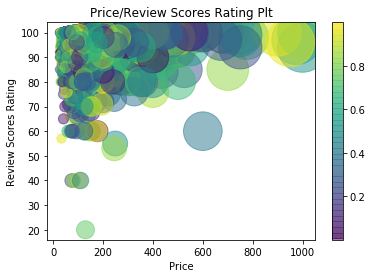

In [30]:
## plot
df_sum = np.sum(df_seattle['price'])
rng = np.random.RandomState(0)
colors = rng.rand(df_seattle['price'].shape[0])
sizes = 1000000 * df_seattle['price']/df_sum

plt.scatter(df_seattle['price'], df_seattle['review_scores_rating'],marker='o',c=colors,s=sizes,alpha=0.5,cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.colorbar()
plt.title('Price/Review Scores Rating Plt')
plt.show()

### Answer Q1
Through the above pictures about 'Price and Review Scores Rating',it shows that the house which price is higher and it's review scores rating's distribute is almost get higher at the same time.And you will find the price of house lower than $400,most of their score are between 70 and 90,which is very high.So,every penny of it,if you want to find a house with high quality, you had better use more money,it's worth it.